# Learning Vector Quantization (LVQ)

## Praktikum

### a) Fungsi *training* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [1]:
import numpy as np

def lvq_fit(train, target, lrate, b, max_epoch):
  label, train_idx = np.unique(target, return_index=True)
  weight = train[train_idx].astype(np.float64)
  train = np.array([e for i, e in enumerate(zip(train, target))if i not in train_idx])
  train, target = train[:, 0], train[:, 1]
  epoch = 0
  while epoch < max_epoch:
    for i, x in enumerate(train):
      distance = [sum((w - x) ** 2) for w in weight]
      min = np.argmin(distance)
      sign = 1 if target[i] == label[min] else -1
      weight[min] += sign * lrate * (x - weight[min])
    lrate *= b
    epoch += 1
  return weight, label

### b) Fungsi *testing* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [2]:
def lvq_predict(X, model):
  center, label = model
  Y = []
  for x in X:
    d = [sum((c - x) ** 2) for c in center]
    Y.append(label[np.argmin(d)])
  return Y

### c) Fungsi hitung akurasi

Tulis kode ke dalam *cell* di bawah ini:

In [3]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

### d) Percobaan data acak dengan visulisasi

Tulis kode ke dalam *cell* di bawah ini:

Accuracy: 0.8571428571428571


C:\Users\WILDAN~1\AppData\Local\Temp/ipykernel_22632/743218238.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(train, target))if i not in train_idx])


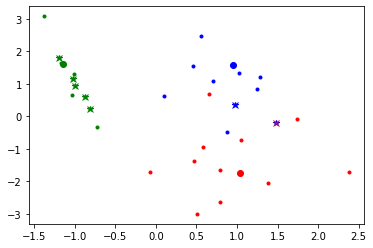

In [67]:
from random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification

X, y = make_classification(n_samples=31, n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

model = lvq_fit(X_train, y_train, lrate=.5, b=.8, max_epoch=50)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
colors = 'rgbcmyk'
print('Accuracy:', accuracy)

for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, y_test):
  plt.plot(x[0], x[1], colors[label] + '*')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')